<a href="https://colab.research.google.com/github/SDSPRASAD546/Machine-Learning/blob/main/SVM_ALGORITHM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tt
from sklearn import svm
from sklearn.metrics import classification_report 

In [12]:
#importing dataset
Raw = pd.read_csv("/content/diabetes.csv")

**Performing EDA on dataset**

In [13]:
#converting raw data into dataframe
data = pd.DataFrame(Raw)
data

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [14]:
#describing the data
data.describe()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


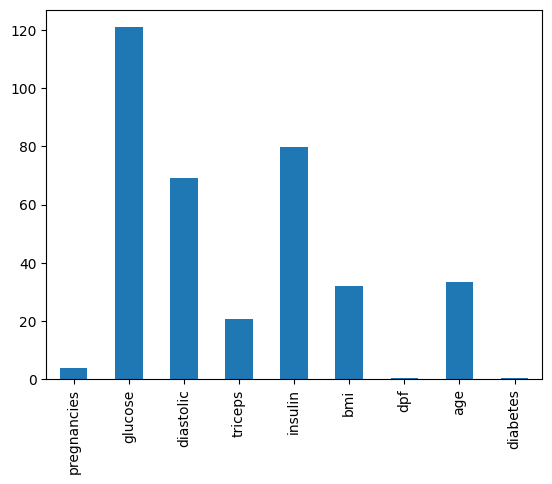

In [24]:
#visuialising mean
data.describe().loc['mean'].plot.bar()
plt.show()

In [15]:
data.shape

(768, 9)

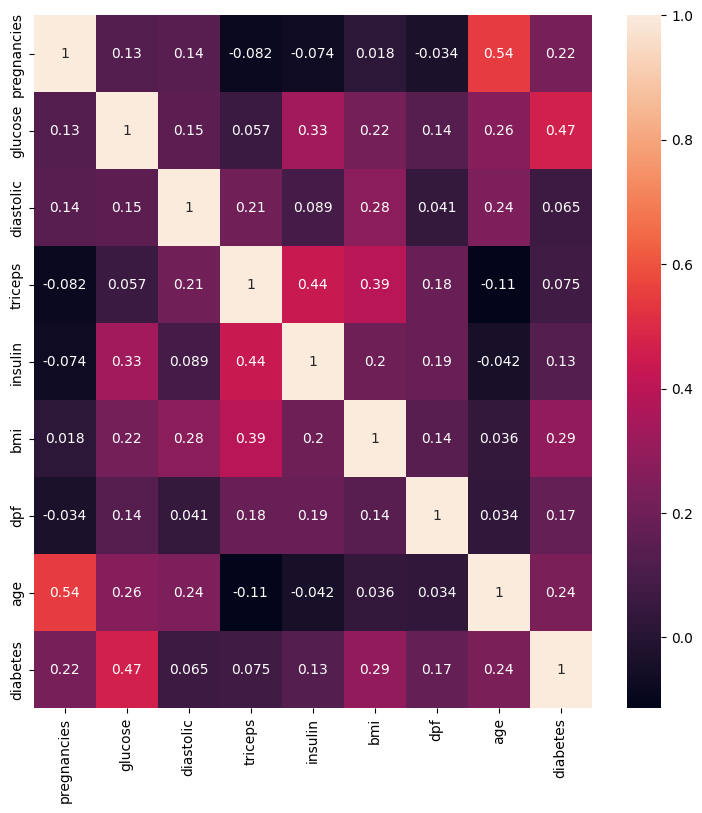

In [21]:
plt.figure(figsize=(9,9))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [25]:
#replacing zeros with mean value of [age,bmi,glucose]
Zero_replace=['glucose','bmi','age']
for column in Zero_replace:
  data[column]  = data[column].replace(0,np.NaN)
  mean = int(data[column].mean(skipna=True))
  data[column]  = data[column].replace(np.NaN,mean)


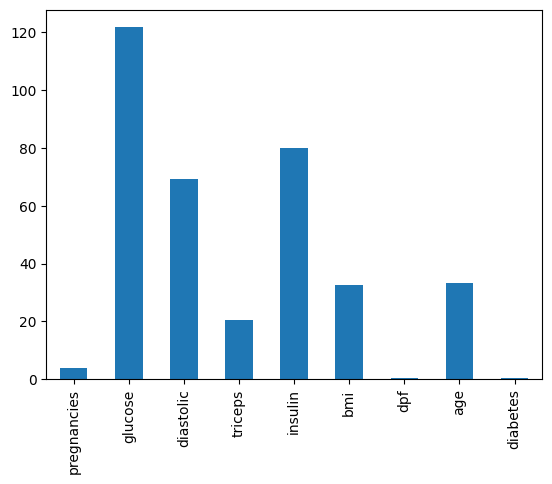

In [27]:
#after replacing the zeros with mean visulizing
data.describe().loc['mean'].plot.bar()
plt.show()

In [42]:
#spliting data for trainning and testng
x=data.drop('diabetes',axis=1).values
y=data['diabetes'].values
xtrain,xtest,ytrain,ytest = tt(x,y,test_size=0.2,random_state=30)

**Performing SVM algorithm**

In [43]:
model = svm.SVC(kernel='linear')
model.fit(xtrain,ytrain)
predict = model.predict(xtest)
predict

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [48]:
#checking accuracy
accuracy = model.score(xtrain,ytrain)
accuracy,model.score(xtest,ytest)

(0.7817589576547231, 0.8051948051948052)

In [51]:
print(classification_report(ytest,predict))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       104
           1       0.74      0.62      0.67        50

    accuracy                           0.81       154
   macro avg       0.78      0.76      0.77       154
weighted avg       0.80      0.81      0.80       154

